# ECoHyMS Controller
### Thermal Energy Storage management validation
#### Cable limitation at 10kW


In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import datetime 
from process_res import ProcessRes

In [2]:
filename = '2020-01-31_08-54-24.csv'
pr = ProcessRes(filename)

### With controller

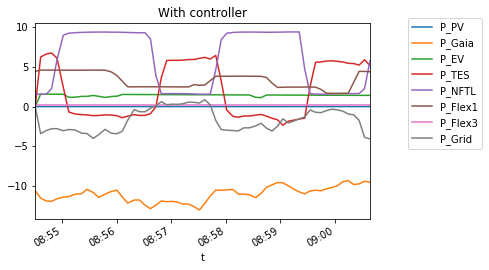

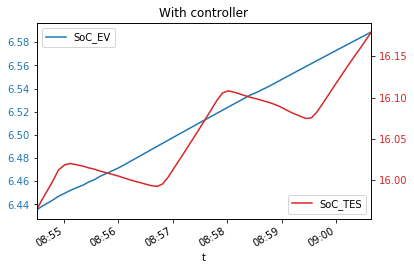

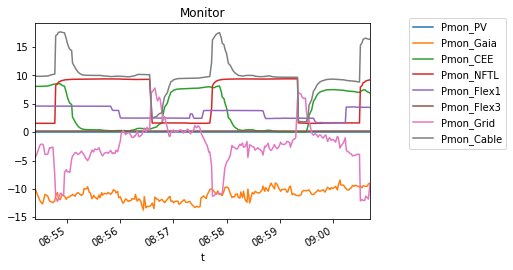

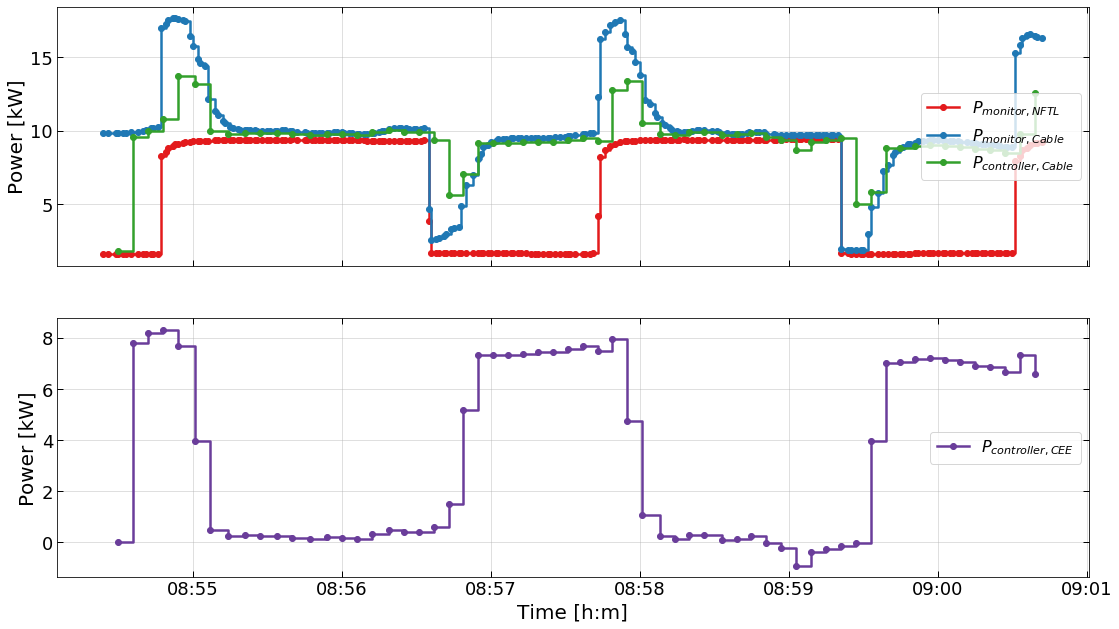

In [3]:
pr.plot_power()
pr.plot_SoC()
pr.plot_power_monitor()
pr.plot_cable_limit()

### Without controller

Without controller, the thermal energy storage is disconnected from the thermal network and the EV battery is charging at constant power P_EV = 7 kW.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


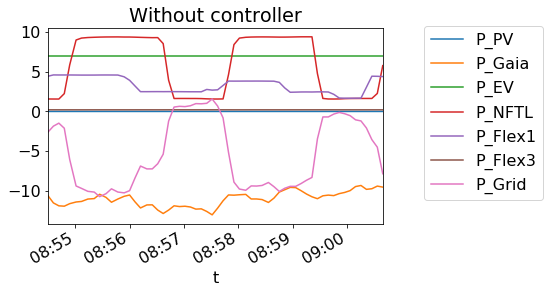

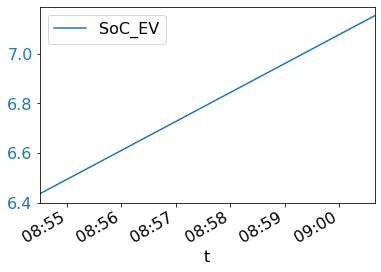

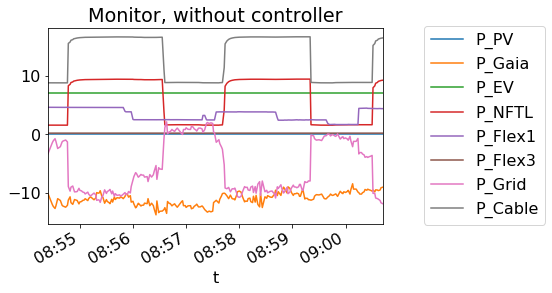

In [4]:
pr.plot_power_nc()
pr.plot_SoC_nc()
pr.plot_power_monitor_nc()

### Results analysis

The controller allows to comply with a certain power limit of the cable, as long as it is physically feasible. 

Because the controllable charge is at the receiving end of the cable, the controller adjusts what it can consume so that the cable limitation is respected. 
We can see that because of the controller delay, there is a limitation violation for about 10-15s before the power in the cable comes down. 

In the case where there is no controller, there is no power limitation through the cable and because there is no flexible charge. 

In [5]:
pr.processing_cable_limitation()
pr.data

type  Cable limit compliance duration (s)  \
0     with controller                                285.0   
1  without controller                                159.0   

   Cable limit violation duration (s)  Cable limit compliance ratio  \
0                                93.0                      0.753968   
1                               219.0                      0.420635   

   Maximum cable power (kW)  Energy bill [DKK/kWh]  Max. in-feed [kW]  \
0                    17.674               0.118646             12.224   
1                    16.618               0.231998             11.811   

   Energy Imported [kWh]  Energy exported [kWh]  Self consumption index  \
0               0.304221               0.053422                0.953788   
1               0.594866               0.015253                0.986806   

   Energy locally generated (PV+WT) [kWh]  EV battery charge [kWh]  \
0                                1.156019                 0.145809   
1                                1.156019                 0.717500   

   TES charge [kWh]  
0          0.198271  
1          0.000000

We can see that because of the long response delay of the controller, in this testcase the cable limitation is respected only 75% of the time. 
Without the controller, it is respected 42% of the time. 

The maximum power that goes through the cable is worst in the case when there is a controller, because the controller didn't have time to adapt to the abrupt change of the NFTL consumption, and it was charging its {EV+TES} thinking that the power through the cable was still low.